# i. Perkenalan

```
Milestone 1
Name: Jonathan Edward Tasek
Batch: HCK-022
Objective: Conduct an analysis to determine the optimal strategy for Airbnb listings by considering factors like price, location, and guest capacity.
```

## Link to Tableau

https://public.tableau.com/app/profile/jonathan.edward.tasek/viz/Visualization_17297699900980/Stats?publish=yes

# ii. Identifikasi Masalah

## SMART ANALYSIS

**Specific:<br>**
An investor is looking to purchase a property for Airbnb in Western Australia Region or Peel Region, with focus in profitability by optimizing on location, pricing, number of bedrooms, and guest ratings. <br>

**Measurable:<br>**
Success will be measured by the region location with access to tourism or business, pricing compared to other listings in the area and average of ratings. In addition, the expectation is to have a positive return on Return on Investment (ROI) for next couple of years.<br>

**Achievable: <br>**
Using historical data to create actionable insights to predict next trend on airbnb listing. Setting competitive price considering seasonality, and local events to maximize occupancy rate. <br>
Focus on guest experience and location with good access to support ratings, and consider location to determine number of bedrooms that are appropriate for the area. <br>

**Relevant:<br>**
WA region offers attraction within metropolitan area, which would attract guest with who are in business trip. This type of guest and the attraction around the area might affect the length of stay. On the other hand, listings in Peel region might offer more tourism attraction from wineries to nature scenery, which might the extend their length of stays. This insight will be valuable for existing host or future investor to find effective location for investment and great pricing stategy. <br>

**Time-bound:<br>**
The investor is aiming to finalize purchasing the property within 6 to 12 months. Aiming occupancy rate above 50% in the first year of operation and maintain high ratings above 4.5 out of 5.0. <br>
<br>


## PROBLEM STATEMENT
The goal is to acquire a property for Airbnb in the WA or Peel Region to enhance profitability by optimizing factors such as location, bedroom count, pricing, and guest ratings. Success will be measured by maintaining high average ratings, achieving competitive pricing, an occupancy rate above 50%, and a focus on positive ROI growth.

# iii. Data Loading

In [295]:
import re
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
from scipy import stats
from scipy.stats import kendalltau

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
# # Make a directory named `.kaggle`
# !mkdir ~/.kaggle

# # Copy the kaggle.json into this new directory
# !cp /content/drive/MyDrive/ise/airbnb_wa.csv ~/.kaggle/

# # Download Dataset
# # Source Dataset : https://www.kaggle.com/datasets/mingslu/airbnb-wa
# !kaggle datasets download -d mingslu/airbnb-wa

# # Ekstrak file
# !unzip -q ./airbnb-wa.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/drive/MyDrive/ise/airbnb_wa.csv': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mingslu/airbnb-wa
License(s): unknown
airbnb-wa.zip: Skipping, found more recently modified local copy (use --force to force download)
replace airbnb_wa.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


## Load CSV

In [297]:
df = pd.read_csv('airbnb_wa.csv')
df.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2115,https://www.airbnb.com/rooms/2115,20230625163423,2023-06-26,city scrape,Bed and breakfast in Como · ★4.97 · 2 bedrooms...,For the discerning traveller. Close to the Cit...,Although we are only 10 minutes by car from th...,https://a0.muscache.com/pictures/airflow/Hosti...,2313,https://www.airbnb.com/users/show/2313,Helen,2008-08-19,"Perth, Australia",Being a retired empty nester who loves welcomi...,within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/c23dd...,https://a0.muscache.com/im/pictures/user/c23dd...,NaN,1,1,"['email', 'phone']",t,f,"Como, Western Australia, Australia",SOUTH PERTH,NaN,-32.006570,115.865150,Private room in bed and breakfast,Private room,5,NaN,1 shared bath,NaN,3.0,"[""Ethernet connection"", ""Children\u2019s books...",$140.00,1,30,1,1,1125,1125,1.0,1125.0,NaN,t,12,31,61,148,2023-06-26,132,59,1,2012-10-30,2023-05-29,4.97,4.97,4.98,4.99,4.99,4.96,4.92,NaN,t,1,0,1,0,1.02
1,59311,https://www.airbnb.com/rooms/59311,20230625163423,2023-06-25,city scrape,Home in Perth · ★4.86 · 1 bedroom · 1 bed · 1....,<b>The space</b><br />This family homes featur...,NaN,https://a0.muscache.com/pictures/359726/4f5915...,284743,https://www.airbnb.com/users/show/284743,Rudy And Lina,2010-11-11,"Western Australia, Australia",A friendly safe environment family house with ...,within a day,50%,100%,NaN,https://a0.muscache.com/im/users/284743/profil...,https://a0.muscache.com/im/users/284743/profil...,NaN,1,2,"['email', 'phone']",t,t,NaN,GOSNELLS,NaN,-32.076280,115.932000,Private room in home,Private room,1,NaN,1.5 baths,NaN,1.0,"[""Free parking on premises"", ""TV"", ""Air condit...",$65.00,1,365,1,1,365,365,1.0,365.0,NaN,t,27,57,87,362,2023-06-25,7,0,0,2010-12-22,2018-04-28,4.86,5.00,5.00,5.00,5.00,4.83,4.83,NaN,t,1,0,1,0,0.05
2,65261,https://www.airbnb.com/rooms/65261,20230625163423,2023-06-26,city scrape,Guest suite in Fremantle · ★4.38 · 1 bedroom ·...,<b>The space</b><br />International travel may...,NaN,https://a0.muscache.com/pictures/2903658/0280f...,319052,https://www.airbnb.com/users/show/319052,Suzanne Elizabeth,2010-12-14,"Fremantle, Australia","I am Australian, but grew up in East Africa. P...",within a day,100%,76%,f,https://a0.muscache.com/im/pictures/user/e3605...,https://a0.muscache.com/im/pictures/user/e3605...,NaN,1,3,"['email', 'phone']",t,f,NaN,FREMANTLE,NaN,-32.047880,115.764180,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Cleaning products"", ""Dedicated workspace"", ""...",$70.00,2,20,2,2,20,20,2.0,20.0,NaN,t,6,33,61,151,2023-06-26,310,36,1,2011-07-08,2023-06-03,4.38,4.47,4.10,4.58,4.64,4.54,4.51,NaN,f,1,1,0,0,2.13
3,875893,https://www.airbnb.com/rooms/875893,2023062516

In [298]:
df.nunique()

,0
id,11507
listing_url,11507
scrape_id,1
last_scraped,2
source,2
name,10781
description,11141
neighborhood_overview,6385
picture_url,11341
host_id,6320


In [299]:
df.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,57
neighborhood_overview,4205
picture_url,0
host_id,0


# iv. DATA CLEANING

## DROP Columns

Dropping columns below as it holds no value.

In [300]:
df = df.drop(["host_neighbourhood", "neighbourhood_group_cleansed", "bathrooms", 'calendar_updated', "license" ], axis=1)
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',


## Bathroom

Initially, there was no numeric information for number of bathrooms. So, I separated the numerical value with text, then recreated ['Bathrooms'] column.
I realized that some values does not show a whole number.
It simply means it has separate toilet and bathroom.

In [301]:
df['bathrooms_text'] = df['bathrooms_text'].astype(str).str.replace('Shared half-', '1 shared ').str.strip()
df['bathrooms_text'] = df['bathrooms_text'].astype(str).str.replace('Private half-', '0.5 private ').str.strip()
df['bathrooms_text'] = df['bathrooms_text'].astype(str).str.replace('Half-', '0.5 ').str.strip()


In [302]:
bathrooms_values = np.where(
    df['bathrooms_text'].str[1] == '.',
    df['bathrooms_text'].str[:3],
    df['bathrooms_text'].str[:1]
)

df.insert(df.columns.get_loc('bathrooms_text'), 'bathrooms', bathrooms_values)

#Creating column to determine shared/private bathrooms
df.insert(df.columns.get_loc('bathrooms_text') + 1, 'sharedbathroom',
          (df['room_type'].str.contains('in home', case=False, na=False) |
           df['bathrooms_text'].str.contains('shared', case=False, na=False)))

df[['bathrooms','bathrooms_text',]].tail(20)

,bathrooms,bathrooms_text
11487,1,1 bath
11488,1,1 bath
11489,1,1 bath
11490,1,1 bath
11491,2,2 baths
11492,1,1 bath
11493,2,2 baths
11494,1,1 bath
11495,2,2 baths
11496,1,1 private bath


In [303]:
# Looking for n values in bathrooms
df.loc[df['bathrooms'] == "n", ["bathrooms", "bathrooms_text","bedrooms", "sharedbathroom","name", "listing_url"]]

,bathrooms,bathrooms_text,bedrooms,sharedbathroom,name,listing_url
403,n,nan,2.0,False,Rental unit in Quinns Rocks · ★4.71 · 2 bedroo...,https://www.airbnb.com/rooms/5310469
465,n,nan,3.0,False,Aparthotel in Fremantle · ★4.72 · 3 bedrooms ·...,https://www.airbnb.com/rooms/5064660
1344,n,nan,3.0,False,Bed and breakfast in Lower Chittering · ★5.0 ·...,https://www.airbnb.com/rooms/13815503
5591,n,nan,NaN,False,Rental unit in Stratham · ★New · 1 bedroom · 1...,https://www.airbnb.com/rooms/44438069


In [304]:
# Checking any bathrooms that are meant to be >=10
df[df['bathrooms_text'].str[1] == '0']

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,sharedbathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
551,6317238,https://www.airbnb.com/rooms/6317238,20230625163423,2023-06-25,city scrape,Guest suite in Denmark · ★4.57 · 10 bedrooms ·...,"31 on the Terrace has 10 rooms with ensuites, ...",Centre of Town .,https://a0.muscache.com/pictures/78944287/9939...,32869593,https://www.airbnb.com/users/show/32869593,Denise,2015-05-07,"Denmark, Australia",Our guesthouse is owned by Denise and Trudy an...,within a day,90%,63%,NaN,https://a0.muscache.com/im/users/32869593/prof...,https://a0.muscache.com/im/users/32869593/prof...,2,4,"['email', 'phone']",t,t,"Denmark, Western Australia, Australia",DENMARK,-34.95968,117.35472,Private room in guest suite,Private room,16,1,10 baths,False,NaN,14.0,"[""Free parking on premises"", ""Hangers"", ""Hot w...",$99.00,1,1125,1,1,1125,1125,1.0,1125.0,t,30,60,90,360,2023-06-25,134,17,0,2015-06-02,2023-05-02,4.57,4.59,4.78,4.88,4.83,4.89,4.40,f,2,0,2,0,1.36
5401,42932289,https://www.airbnb.com/rooms/42932289,20230625163423,2023-06-26,city scrape,Guesthouse in Albany · ★4.54 · 10 bedrooms · 2...,City central 200m from the waters edge with a ...,NaN,https://a0.muscache.com/pictures/d578d3e9-3388...,303555494,https://www.airbnb.com/users/show/303555494,SixD,2019-10-21,NaN,NaN,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/2109e...,https://a0.muscache.com/im/pictures/user/2109e...,4,5,"['email', 'phone']",t,t,NaN,ALBANY,-35.02667,117.88597,Entire guesthouse,Entire home/apt,4,1,10 baths,False,10.0,28.0,"[""Piano"", ""Cleaning products"", ""Wine glasses"",...",$170.00,1,99,1,1,99,99,1.0,99.0,t,30,60,89,247,2023-06-26,90,27,2,2020-05-21,2023-06-18,4.54,4.74,4.76,4.72,4.64,4.83,4.57,t,4,1,3,0,2.39
9058,730746314266573750,https://www.airbnb.com/rooms/730746314266573750,20230625163423,2023-06-25,city scrape,Home in Wonnerup · 11 bedrooms · 14 beds · 10 ...,The beach retreat that will cater for your who...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,111898575,https://www.airbnb.com/users/show/111898575,Michael,2017-01-17,"Dunsborough, Australia",@margaretriverproperties #margaretriverpropert...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/62320...,https://a0.muscache.com/im/pictures/user/62320...,68,79,"['email', 'phone', 'work_email']",t,t,NaN,BUSSELTON,-33.61908,115.42052,Entire home,Entire home/apt,16,1,10 baths,False,11.0,14.0,"[""Oven"", ""Cleaning products"", ""Stove"", ""Fire p...",$616.00,3,365,2,7,365,365,2.7,365.0,t,12,16,16,16,2023-06-25,2,2,0,2022-11-18,2023-01-02,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,52,52,0,0,0.27
11113,891043703475303509,https://www.airbnb.com/rooms/891043703475303509,20230625163423,2023-06-25,city scrape,Home in Wonnerup · ★New · 11 bedrooms · 16 bed...,Sur Isle Estate is a private coastal 

There are 8 listing that does not have any information about bathroom. I looked to this information manually, hence I am filling up this information based on my research.

In [305]:
# Replace 'n' values in 'bathrooms' column
df.loc[403, 'bathrooms'] = '2'
df.loc[465, 'bathrooms'] = '2'
df.loc[1344, 'bathrooms'] = '3'

# Replace 1 value to 10 in bathrooms column
df.loc[551, 'bathrooms'] = '10'
df.loc[5401, 'bathrooms'] = '10'
df.loc[9058, 'bathrooms'] = '10'
df.loc[11113, 'bathrooms'] = '10'

# Dropping row because listing has been deleted
df = df.drop(index=5591)

# Changing bathroom data type to float
df['bathrooms'] = df['bathrooms'].astype(float, errors='ignore')


In [306]:
# Display rows with specific indices and columns
df.loc[[403, 465, 1344, 551, 5401, 9058, 11113], ["bathrooms", "bathrooms_text","bedrooms", "sharedbathroom","name"]]

,bathrooms,bathrooms_text,bedrooms,sharedbathroom,name
403,2.0,nan,2.0,False,Rental unit in Quinns Rocks · ★4.71 · 2 bedroo...
465,2.0,nan,3.0,False,Aparthotel in Fremantle · ★4.72 · 3 bedrooms ·...
1344,3.0,nan,3.0,False,Bed and breakfast in Lower Chittering · ★5.0 ·...
551,10.0,10 baths,NaN,False,Guest suite in Denmark · ★4.57 · 10 bedrooms ·...
5401,10.0,10 baths,10.0,False,Guesthouse in Albany · ★4.54 · 10 bedrooms · 2...
9058,10.0,10 baths,11.0,False,Home in Wonnerup · 11 bedrooms · 14 beds · 10 ...
11113,10.0,10 baths,11.0,False,Home in Wonnerup · ★New · 11 bedrooms · 16 bed...


## Bedroom

In [307]:
# Group data by whether 'bedrooms' is null
grouped_null_bedrooms = df.groupby(df['bedrooms'].isnull())
# Get the size of each group
group_sizes = grouped_null_bedrooms.size()
group_sizes


,0
bedrooms,
False,9765
True,1741


In [308]:
def extract_bedrooms(name):
    """
    Extracts the number of bedrooms from a property name string.
    """
    match = re.search(r'(\d+)\s*(?:bedrooms?|br|bd)', name, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None  # Return None if no bedroom information is found

# Apply the extraction function to the 'name' column
df['bedrooms_extracted'] = df['name'].apply(extract_bedrooms)

# Replace null values in 'bedrooms' with values from 'bedrooms_extracted'
df['bedrooms'] = df['bedrooms'].where(df['bedrooms'].notnull(), df['bedrooms_extracted'])

df.head(10)



,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,sharedbathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bedrooms_extracted
0,2115,https://www.airbnb.com/rooms/2115,20230625163423,2023-06-26,city scrape,Bed and breakfast in Como · ★4.97 · 2 bedrooms...,For the discerning traveller. Close to the Cit...,Although we are only 10 minutes by car from th...,https://a0.muscache.com/pictures/airflow/Hosti...,2313,https://www.airbnb.com/users/show/2313,Helen,2008-08-19,"Perth, Australia",Being a retired empty nester who loves welcomi...,within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/c23dd...,https://a0.muscache.com/im/pictures/user/c23dd...,1,1,"['email', 'phone']",t,f,"Como, Western Australia, Australia",SOUTH PERTH,-32.006570,115.865150,Private room in bed and breakfast,Private room,5,1.0,1 shared bath,True,2.0,3.0,"[""Ethernet connection"", ""Children\u2019s books...",$140.00,1,30,1,1,1125,1125,1.0,1125.0,t,12,31,61,148,2023-06-26,132,59,1,2012-10-30,2023-05-29,4.97,4.97,4.98,4.99,4.99,4.96,4.92,t,1,0,1,0,1.02,2.0
1,59311,https://www.airbnb.com/rooms/59311,20230625163423,2023-06-25,city scrape,Home in Perth · ★4.86 · 1 bedroom · 1 bed · 1....,<b>The space</b><br />This family homes featur...,NaN,https://a0.muscache.com/pictures/359726/4f5915...,284743,https://www.airbnb.com/users/show/284743,Rudy And Lina,2010-11-11,"Western Australia, Australia",A friendly safe environment family house with ...,within a day,50%,100%,NaN,https://a0.muscache.com/im/users/284743/profil...,https://a0.muscache.com/im/users/284743/profil...,1,2,"['email', 'phone']",t,t,NaN,GOSNELLS,-32.076280,115.932000,Private room in home,Private room,1,1.5,1.5 baths,False,1.0,1.0,"[""Free parking on premises"", ""TV"", ""Air condit...",$65.00,1,365,1,1,365,365,1.0,365.0,t,27,57,87,362,2023-06-25,7,0,0,2010-12-22,2018-04-28,4.86,5.00,5.00,5.00,5.00,4.83,4.83,t,1,0,1,0,0.05,1.0
2,65261,https://www.airbnb.com/rooms/65261,20230625163423,2023-06-26,city scrape,Guest suite in Fremantle · ★4.38 · 1 bedroom ·...,<b>The space</b><br />International travel may...,NaN,https://a0.muscache.com/pictures/2903658/0280f...,319052,https://www.airbnb.com/users/show/319052,Suzanne Elizabeth,2010-12-14,"Fremantle, Australia","I am Australian, but grew up in East Africa. P...",within a day,100%,76%,f,https://a0.muscache.com/im/pictures/user/e3605...,https://a0.muscache.com/im/pictures/user/e3605...,1,3,"['email', 'phone']",t,f,NaN,FREMANTLE,-32.047880,115.764180,Entire guest suite,Entire home/apt,2,1.0,1 bath,False,1.0,1.0,"[""Cleaning products"", ""Dedicated workspace"", ""...",$70.00,2,20,2,2,20,20,2.0,20.0,t,6,33,61,151,2023-06-26,310,36,1,2011-07-08,2023-06-03,4.38,4.47,4.10,4.58,4.64,4.54,4.51,f,1,1,0,0,2.13,1.0
3,875893,https://www.airbnb.com/rooms/875893,20230625163423,2023-06-26,city scrape,Home in Mosman Park · ★4.95 · 

In [309]:
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce').fillna(1).astype(int)
null_count = df['bedrooms'].isna().sum()
null_count

0

In [310]:
#Dropping bedrooms_extracted as it is no longer needed.
df = df.drop(["bedrooms_extracted" ], axis=1)
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'sharedbathroom', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       

In [311]:
# Select rows where 'description' is null
null_description_df = df.loc[df['review_scores_rating'].isnull()]

# Print the selected rows
null_description_df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,sharedbathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
21,141083,https://www.airbnb.com/rooms/141083,20230625163423,2023-06-26,previous scrape,Home in Jindalee · 1 bedroom · 1 bed · Half-bath,<b>The space</b><br />Extra large bedroom with...,NaN,https://a0.muscache.com/pictures/990977/d402ca...,686529,https://www.airbnb.com/users/show/686529,Suzy,2011-06-10,"Jindalee, Australia",I am a retired Police Officer and a mother of ...,a few days or more,0%,0%,NaN,https://a0.muscache.com/im/users/686529/profil...,https://a0.muscache.com/im/users/686529/profil...,1,3,['email'],t,f,NaN,WANNEROO,-31.653730,115.692590,Private room in home,Private room,2,0.5,0.5 bath,False,1,1.0,"[""Free parking on premises"", ""TV"", ""Smoking al...",$195.00,2,90,2,2,90,90,2.0,90.0,f,0,0,0,0,2023-06-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
45,1089259,https://www.airbnb.com/rooms/1089259,20230625163423,2023-06-26,city scrape,Bed and breakfast in Alexander Heights · 1 bed...,"This bedroom is in a quality, purpose built B&...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,5984984,https://www.airbnb.com/users/show/5984984,Natalie,2013-04-18,Australia,Together with my husband MICHAEL we run our As...,NaN,NaN,0%,NaN,https://a0.muscache.com/im/users/5984984/profi...,https://a0.muscache.com/im/users/5984984/profi...,1,1,"['email', 'phone']",t,f,NaN,WANNEROO,-31.829672,115.868126,Private room in bed and breakfast,Private room,2,1.0,1 private bath,False,1,1.0,"[""Ethernet connection"", ""Cleaning products"", ""...",$179.00,1,1125,1,1,1,1125,1.0,54.3,t,26,55,85,356,2023-06-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
120,1679708,https://www.airbnb.com/rooms/1679708,20230625163423,2023-06-26,previous scrape,Rental unit in Perth · 1 bedroom · 2 beds · 1 ...,My apartment is in a fabulous position close t...,NaN,https://a0.muscache.com/pictures/24025744/4986...,4637490,https://www.airbnb.com/users/show/4637490,Peter,2013-01-09,"Perth, Australia","Hi,\r\n\r\nMy name is Peter, I an executive wo...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/4637490/profi...,https://a0.muscache.com/im/users/4637490/profi...,1,1,"['email', 'phone', 'work_email']",t,t,NaN,SUBIACO,-31.987060,115.815430,Entire rental unit,Entire home/apt,3,1.0,1 bath,False,1,2.0,"[""Free parking on premises"", ""TV"", ""Air condit...",$250.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,0,2023-06-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
171,2951086,https://www.airbnb.com/rooms/2951086,20230625163423,2023-06-26,previous scrape,Guest suite in Fremantle · 2 bedrooms · 1 bed ...,* Located within a magnificent 1890's Heritage...,Fremantle is a vibrant city full of exciting p...,https://a0.muscache.com/pictures/cfdaffd6-a9f1...,7467951,https://www.airbnb.com/users/show/74

In [312]:
# random check
df[df['listing_url']== 'https://www.airbnb.com/rooms/5064660?source_impression_id=p3_1729344262_P3GQVV4pfvTHtRcf']

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,sharedbathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


Information about bedroom is on of the most essential information in this dataset. However, I noticed that there are many missing values in ['bedrooms'] in which further cleaning required.

After observing this data, I noticed that ['Name'] holds information about bedroom which can be extracted. So I extracted that information and created a temporary column called ['bedroom_extracted]. Then I replaced any null values in ['bedrooms'] this every null values with values from ['bedroom_extracted].

However, there are still plenty of missing values, then I performed some grouping and did a sample check on the property type of the missing values. I found out that the reamining null does not have value due to its property type, which either a shared property, or a standalone room/studio. Hence, I decided to replace the reamining null with 1.

Last, I dropped ['bedroom_extracted] for a cleaner dataset.

## Host is superhost


Super host is exclusively determined by airbnb, hence it's difficult to find pattern on how airbnb would choose a host as a super host. For the purpose of this analysis, I am replacing misisng values as false/host is not a super host.


In [313]:
df['host_is_superhost'].unique()

array([nan, 'f', 't'], dtype=object)

In [314]:
df['host_is_superhost'].fillna('f', inplace = True)
df['host_is_superhost'].isnull().sum()

<ipython-input-314-472e86014589>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_is_superhost'].fillna('f', inplace = True)


0

## Reviews

In [315]:
for i in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
  print(i)
  print(df[i].min())
  print(df[i].max())

review_scores_rating
0.0
5.0
review_scores_accuracy
1.0
5.0
review_scores_cleanliness
1.0
5.0
review_scores_checkin
1.0
5.0
review_scores_communication
1.0
5.0
review_scores_location
1.0
5.0
review_scores_value
1.0
5.0


In [316]:
# Checking number of reviews in the past 365 days
df['number_of_reviews_ltm'].unique()

array([ 59,   0,  36,   4,  42,   2,  14,  19,   6,   8,  15,   3,   1,
        32,  35,  25,  16,   7,  29,  53,  12,  10,  37,  18,  20,  13,
        34,  31,  50,  21,   9,  69,  22,   5,  80,  63,  30,  46,  27,
        28,  33,  23,  47,  57,  43,  44,  49,  24,  11,  17,  40,  51,
        38,  45,  26,  52,  68,  54,  41,  55,  71,  88,  48, 148,  56,
        39,  73,  60,  86,  65, 123, 100, 125,  58,  67, 109, 133,  76,
        97,  99,  64,  70,  62, 102,  72,  66,  84,  92,  82, 116,  81,
        85,  74, 105,  95,  98, 106,  87,  61,  78,  91,  90,  79,  75,
       103,  89,  96, 104,  93, 121, 131, 111,  83, 137, 112,  77, 110,
        94, 128, 156, 120])

In [317]:
df[df['review_scores_rating'].isna()]['number_of_reviews_ltm'].value_counts()

,count
number_of_reviews_ltm,
0,1080


In [318]:
for i in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
  print(i)
  print(df[df['number_of_reviews_ltm']== 0][i].mode().values[0])

review_scores_rating
5.0
review_scores_accuracy
5.0
review_scores_cleanliness
5.0
review_scores_checkin
5.0
review_scores_communication
5.0
review_scores_location
5.0
review_scores_value
5.0


In [319]:
#fill na to 5.0 based on the mode of
for i in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
  df[i] = df[i].fillna(5.0)
  print(df[i].isna().sum())

0
0
0
0
0
0
0


In [320]:
df.isna().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,57
neighborhood_overview,4205
picture_url,0
host_id,0


From The research above, the mode of review value is 5.0, hence i am replacing null values with 5. However, I noticed a pattern that some listings has no value in number_of_reviews_ltm, indicating that no one ever given any reviews to the listing in the past 365 days.

## First Review & Last Review


In [321]:
df['first_review'].unique()

array(['2012-10-30', '2010-12-22', '2011-07-08', ..., '2023-05-24',
       '2023-06-22', '2023-06-23'], dtype=object)

This has similar pattern with reviews column, as there is no value in number_of_reviews_ltm. <br>
It is most likely there has not been any reviews yet. Hence, replacing the date with last scrapped date assuming that the property has only been recently listed around scraping date.<br> In the other words, there is no prior reviews for newly listed property.

In [322]:
df[['calendar_last_scraped','first_review','last_review']].sample(10)

,calendar_last_scraped,first_review,last_review
9168,2023-06-26,2022-11-25,2023-04-13
5319,2023-06-25,2021-05-31,2023-05-28
7153,2023-06-26,2021-11-12,2023-04-09
5257,2023-06-25,2020-07-02,2023-06-18
1224,2023-06-25,2017-01-09,2023-05-14
4954,2023-06-26,2019-11-24,2023-06-01
1473,2023-06-26,2016-10-05,2023-04-16
1152,2023-06-26,2018-02-18,2022-12-03
159,2023-06-25,2015-03-02,2023-06-05
9587,2023-06-26,NaN,NaN


In [323]:
#replacing null values in first_review and last review with calendar_last_scraped
df.fillna({"first_review":df['calendar_last_scraped']},inplace=True)
df.fillna({"last_review":df['calendar_last_scraped']},inplace=True)

In [324]:
df.isna().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,57
neighborhood_overview,4205
picture_url,0
host_id,0


## Host Response Rate

In [325]:
df_noresponse = df[df['host_response_time'].isna()]

for i in ['host_response_rate', 'host_acceptance_rate']:
  print(i)
  print(df_noresponse[i].value_counts())

host_response_rate
Series([], Name: count, dtype: int64)
host_acceptance_rate
host_acceptance_rate
100%    252
0%       90
50%      34
67%      17
80%      11
92%      11
60%       9
75%       9
33%       8
83%       7
91%       7
54%       6
89%       6
95%       5
82%       5
90%       5
86%       5
96%       4
85%       4
43%       4
40%       4
77%       3
73%       3
68%       3
78%       3
71%       3
58%       3
97%       2
72%       2
87%       2
56%       2
93%       2
94%       2
14%       2
98%       2
79%       2
70%       2
29%       2
53%       1
11%       1
52%       1
20%       1
64%       1
25%       1
81%       1
69%       1
62%       1
63%       1
Name: count, dtype: int64


In [326]:
len(df_noresponse)

1237

In [327]:
df[df['host_acceptance_rate'] == '100%']['host_response_time'].value_counts()

,count
host_response_time,
within an hour,3749
within a few hours,271
within a day,103
a few days or more,4


In [328]:
df[df['host_acceptance_rate'] == '0%']['host_response_time'].value_counts()

,count
host_response_time,
within a day,40
a few days or more,31
within a few hours,30
within an hour,6


In [329]:
df["host_response_time"].fillna("within an hour", inplace=True)

<ipython-input-329-61403926b1c4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["host_response_time"].fillna("within an hour", inplace=True)


In [330]:
df[df['host_response_time'].isna()]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,sharedbathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [331]:
df['host_acceptance_rate'].fillna("100%", inplace=True)

<ipython-input-331-e9e6866d6d0b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_acceptance_rate'].fillna("100%", inplace=True)


In [332]:
#Checking if no response rate has good acceptance rate.
df[df["host_response_rate"].isna()]["host_acceptance_rate"].value_counts().head(5)

,count
host_acceptance_rate,
100%,936
0%,90
50%,34
67%,17
80%,11


When response rate is null, the mode in acceptance rate is 100%. This means that host might have an instant booking feature that will automaticaly accept bookings. For this reason, I am replacing null in response rate with 100%.

In [333]:
df["host_response_rate"].fillna("100%", inplace=True)

<ipython-input-333-1ecc32d1188e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["host_response_rate"].fillna("100%", inplace=True)


## Description

As description column is text and it would be a constraint to analyze values full of naratives, I will not perform any further  analysis on description column. As result, I am replacing any null values to "no description" for cleaning purposes.


In [334]:
df["description"].fillna("no description", inplace=True)

<ipython-input-334-2bce96bc4a63>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["description"].fillna("no description", inplace=True)


## Neighbourhood overview

As neighborhood_overview column is text and it would be a constraint to analyze values full of naratives, I will not perform any further  analysis on neighborhood_overview column. As result, I am replacing any null values to "no neighborhood_overview" for cleaning purposes.


In [335]:
df["neighborhood_overview"].fillna("no description", inplace=True)

<ipython-input-335-96b16e0a05d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["neighborhood_overview"].fillna("no description", inplace=True)


In [336]:
#dropping Neighbourhood column as it become redundant, as I will be using neighbourhood_cleansed
df.drop(columns=["neighbourhood"], inplace=True)

## Host Location

Replacing null in host location with "Perth, Australia" as the mode value in this column.

In [337]:
df["host_location"].value_counts().head(5)

,count
host_location,
"Perth, Australia",1733
"Western Australia, Australia",705
"Margaret River, Australia",479
"Dunsborough, Australia",418
"Fremantle, Australia",343


In [338]:
df['host_location'].fillna("Perth, Australia", inplace=True)

<ipython-input-338-306eeff19d68>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_location'].fillna("Perth, Australia", inplace=True)


## Host About

As host_about column is text and it would be a constraint to analyze values full of naratives, I will not perform any further  analysis on host_about column. As result, I am replacing any null values to "no host_about" for cleaning purposes.


In [339]:
df["host_about"].fillna("no description", inplace=True)

<ipython-input-339-9b6333890a4c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["host_about"].fillna("no description", inplace=True)


In [340]:
df.isna().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,0
neighborhood_overview,0
picture_url,0
host_id,0


## Beds

As there is no information about beds in names or other columns, I am replacing null values in beds with number of bedrooms, assuming each bedrooms will have one double sized bed.

In [341]:
df[df["beds"].isna()][['name','beds','bedrooms','property_type','room_type','accommodates']].sample(10)

,name,beds,bedrooms,property_type,room_type,accommodates
10932,Villa in Cable Beach · ★New · 2 bedrooms · 2 b...,NaN,2,Entire villa,Entire home/apt,4
1432,Chalet in Witchcliffe · ★5.0 · Studio · 2.5 baths,NaN,1,Entire chalet,Entire home/apt,4
5263,Bungalow in Forest Grove · Studio · 1 shared bath,NaN,1,Private room in bungalow,Private room,6
6540,Guesthouse in Hamilton Hill · ★4.74 · 1 bedroo...,NaN,1,Entire guesthouse,Entire home/apt,2
6910,Farm stay in Metricup · 1 bath,NaN,1,Farm stay,Entire home/apt,2
866,Home in Ocean Beach · ★4.88 · 1 bedroom · 2 baths,NaN,1,Entire home,Entire home/apt,12
67,Home in Ardross · ★4.86 · 1 bedroom · 0 shared...,NaN,1,Private room in home,Private room,1
3411,Boutique hotel in Guildford · ★4.50 · Studio ·...,NaN,1,Room in boutique hotel,Private room,2
6504,Home in Cottesloe · ★4.95 · 1 bedroom · 1 shar...,NaN,1,Private room in home,Private room,1
6968,Rental unit in West Leederville · ★4.33 · 1 be...,NaN,1,Private room in rental unit,Private room,1


In [342]:
#Replacing null in beds with values in bedrooms
df.fillna({"beds":df['bedrooms']},inplace=True)

## Reviews per month

In [343]:
print(df['reviews_per_month'].median())
print(df['reviews_per_month'].mode())
print(df['reviews_per_month'].mean())
df["reviews_per_month"].value_counts().head(10)


1.19
0    1.0
Name: reviews_per_month, dtype: float64
1.6183186265106468


,count
reviews_per_month,
1.00,181
0.33,77
2.00,76
0.17,69
0.34,66
0.24,66
0.55,63
0.48,63
0.42,60


In [344]:
#Replacing null values with values from mode
df["reviews_per_month"].fillna(1, inplace=True)

<ipython-input-344-afd6a47e6786>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(1, inplace=True)


In [345]:
df.isna().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,0
neighborhood_overview,0
picture_url,0
host_id,0


## Price

In [346]:
#Changing data type in price and removing unnecessary item.
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

## Dates

In [347]:
#Changing columns below to date type
date_columns = ['first_review', 'last_review', 'host_since', 'calendar_last_scraped']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

## Rates

In [348]:
# Changing rates column to float and remove "%"
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace('%', '').astype(float)
df["host_response_rate"] = df["host_response_rate"].str.replace('%', '').astype(float)

## Western Australia Subregions

Western Australia is divided into WA Subregions and Peel Region. WA Subregions in general has higher density, while Peel Region has lower density and normally located further away from metropolitan area. <br>
**wa_subregion = False means listing is located in Peel Region.**

In [349]:
#Creating new column called wa_subregion
wa_subregion = ["Bayswater","belmont", "canning", "fremantle", "melville", "nedlands", "perth", "south perth", "stirling", "subiaco","vincent", "peppermint grove", "bassendean", "cambridge", "claremont", "cottesloe", "east fremantle", "mosman park", "victoria park", "kalamunda", "swan", "mundaring", "joondalup", "wanneroo", "armadale", "gosnells", "serpentine", "jarrahdale", "cockburn", "kwinana", "rockingham"]
df["wa_subregion"] = df["neighbourhood_cleansed"].str.contains('|'.join(wa_subregion), case=False)
df.sample(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,sharedbathroom,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,wa_subregion
7296,53407217,https://www.airbnb.com/rooms/53407217,20230625163423,2023-06-26,previous scrape,Resort in Broadwater · 1 bedroom · 1 private bath,"In our Studio Villas, cool shades of white and...",no description,https://a0.muscache.com/pictures/miso/Hosting-...,302240564,https://www.airbnb.com/users/show/302240564,Matthew,2019-10-14,"Perth, Australia",no description,within an hour,100.0,100.0,f,https://a0.muscache.com/im/pictures/user/a81d8...,https://a0.muscache.com/im/pictures/user/a81d8...,5,6,"['email', 'phone', 'work_email']",t,t,BUSSELTON,-33.658424,115.277161,Private room in resort,Private room,2,1.0,1 private bath,False,1,1.0,"[""Shared indoor pool - available all year, ope...",203.0,7,365,7,7,1125,1125,7.0,1125.0,f,0,0,0,0,2023-06-26,1,1,0,2022-10-03,2022-10-03,3.00,4.00,5.00,1.00,1.00,5.00,1.00,f,4,0,4,0,0.11,False
4995,40662982,https://www.airbnb.com/rooms/40662982,20230625163423,2023-06-26,city scrape,Home in Gracetown · ★4.97 · 3 bedrooms · 4 bed...,"Our place is a lovely 2 story, 3 bedroom, 3 ba...",Gracetown is a tranquil beachside community wi...,https://a0.muscache.com/pictures/miso/Hosting-...,71396719,https://www.airbnb.com/users/show/71396719,Sally,2016-05-10,"Margaret River, Australia",I'm originally a Perth girl but made the move ...,within an hour,100.0,100.0,f,https://a0.muscache.com/im/pictures/user/b7062...,https://a0.muscache.com/im/pictures/user/b7062...,3,3,"['email', 'phone']",t,f,AUGUSTA-MARGARET RIVER,-33.866810,114.986470,Entire home,Entire home/apt,6,3.0,3 baths,False,3,4.0,"[""Oven"", ""Cleaning products"", ""Children\u2019s...",369.0,3,1125,3,4,1125,1125,3.1,1125.0,t,26,50,78,297,2023-06-26,65,25,0,2019-12-26,2023-05-07,4.97,4.98,4.95,5.00,4.98,4.97,4.88,f,3,3,0,0,1.52,False
2420,21018152,https://www.airbnb.com/rooms/21018152,20230625163423,2023-06-25,city scrape,Home in Bunbury · ★4.93 · 2 bedrooms · 3 beds ...,The Deli House<br />A quaint cottage attached ...,"If you love your coffee, the Deli house is not...",https://a0.muscache.com/pictures/1138d811-4fdb...,52202829,https://www.airbnb.com/users/show/52202829,Karen,2015-12-25,"Bunbury, Australia",no description,within an hour,100.0,98.0,t,https://a0.muscache.com/im/pictures/user/24984...,https://a0.muscache.com/im/pictures/user/24984...,1,1,"['email', 'phone']",t,t,BUNBURY,-33.329300,115.642340,Entire home,Entire home/apt,4,1.0,1 bath,False,2,3.0,"[""Oven"", ""Stove"", ""Private backyard \u2013 Ful...",143.0,2,28,2,2,1125,1125,2.0,1125.0,t,7,37,66,66,2023-06-25,355,72,5,2017-09-29,2023-06-18,4.93,4.97,4.95,4.99,5.00,4.94,4.95,f,1,1,0,0,5.08,False
6815,51544963,https://www.airbnb.com/rooms/51544963,20230625163423,2023-06-26,city scrape,Cabin in Broadwater · ★4.53 · 2 bedrooms · 2 b...,Modern 2 bedro

## Save to CSV

In [350]:
# Saving cleansed to csv
df.to_csv('airbnb_wa_clean.csv', index=False)

# v. Analisis dan Perhitungan

## Overview Analysis

In [351]:
print(f"Mean Price: {df['price'].mean().round(2)}")
print(f"Median Price: {df['price'].median()}")
print(f"Mode Price: {df['price'].mode().values[0]}")
print(f'Skew Price: {df["price"].skew().round(2)}')
print("")
print(f"Mean Accommodates: {df['accommodates'].mean().round(2)}")
print(f"Median Accommodates: {df['accommodates'].median()}")
print(f"Mode Accommodates: {df['accommodates'].mode().values[0]}")
print(f'Skew Accommodates: {df["accommodates"].skew().round(2)}')
print("")
print(f"Mean Bedrooms: {df['bedrooms'].mean().round(2)}")
print(f"Median Bedrooms: {df['bedrooms'].median()}")
print(f"Mode Bedrooms: {df['bedrooms'].mode().values[0]}")
print(f'Skew Bedrooms: {df["bedrooms"].skew().round(2)}')
print("")
print(f"Mean Bathrooms: {df['bathrooms'].mean().round(2)}")
print(f"Median Bathrooms: {df['bathrooms'].median()}")
print(f"Mode Bathrooms: {df['bathrooms'].mode().values[0]}")
print(f'Skew Bathrooms: {df["bathrooms"].skew().round(2)}')
print("")

Mean Price: 264.27
Median Price: 199.0
Mode Price: 150.0
Skew Price: 16.13

Mean Accommodates: 4.71
Median Accommodates: 4.0
Mode Accommodates: 2
Skew Accommodates: 0.94

Mean Bedrooms: 2.27
Median Bedrooms: 2.0
Mode Bedrooms: 1
Skew Bedrooms: 7.38

Mean Bathrooms: 1.49
Median Bathrooms: 1.0
Mode Bathrooms: 1.0
Skew Bathrooms: 2.39



The median price of listings falls between AUD 199 and AUD 264. With a price skewness of 16.13, the data shows a highly right-skewed distribution, indicating that a few expensive listings have raised the average price above the median. This suggests that while most properties are priced near the median, some high-end listings are pulling the average higher. <br> <br>

Regarding capacity, most listings can accommodate 4 people, which aligns with the average number of bedrooms being two. <br><br>
While the median for bathroom is one, the average equals to 1.49. This could be because some listing has 1.5 bathrooms, meaning that the property listed has separated toilet and bathroom. <br>
From 4 categories above, all result for skewness is positive, which means it is rightly skewed with higher value on occured as outliers.

## Average Bathrooms per Bedroom

<ipython-input-352-13d7f9eea425>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bedrooms', y='bathrooms', data=df, estimator=np.mean, ci=None)


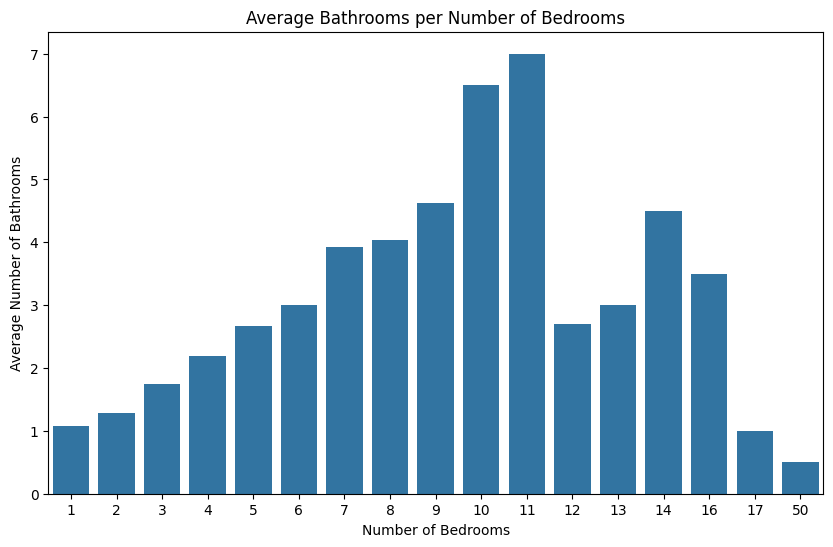

In [352]:
# Creating Bar chart for average bathroom and bedroom
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='bathrooms', data=df, estimator=np.mean, ci=None)
plt.title('Average Bathrooms per Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Number of Bathrooms')
plt.show()

The bar chart above illustrating the correlation between average of bathrooms and average of bedrooms. Showing that a property would have more average of bathroom when the property could holds more people with more bedrooms.

## Distribution of Listing by Region

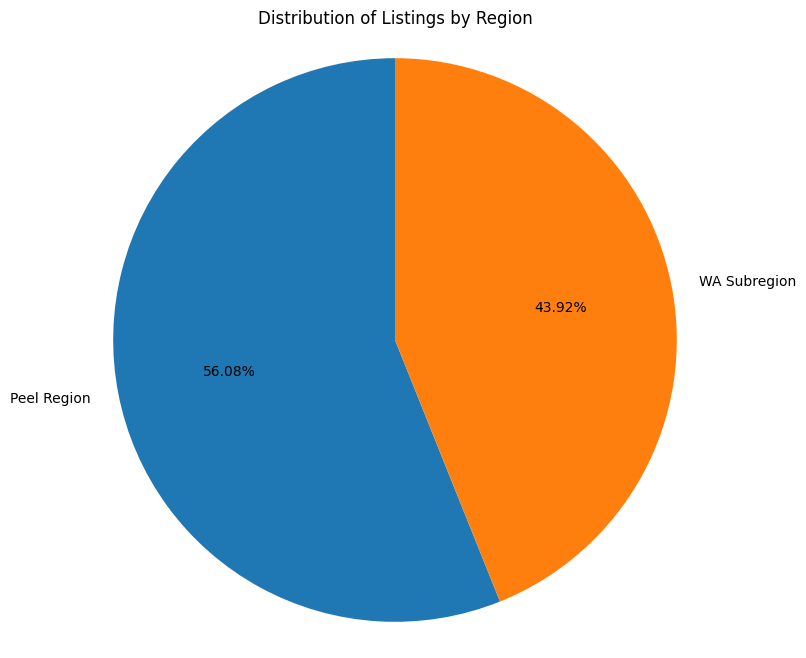

In [353]:
# Count occurrences of True and False in 'wa_subregion'
wa_subregion_counts = df['wa_subregion'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(wa_subregion_counts, labels=['Peel Region', 'WA Subregion'], autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Listings by Region')
plt.axis('equal')
plt.show()

The above chart shows that listings are predominantly within Peel Region. This  is considered very high considering the distance to Peel Region and population density in the area. This explains that the majority of listngs are holiday home or related to leisure.

## Barchart for Distibution of Bedroom

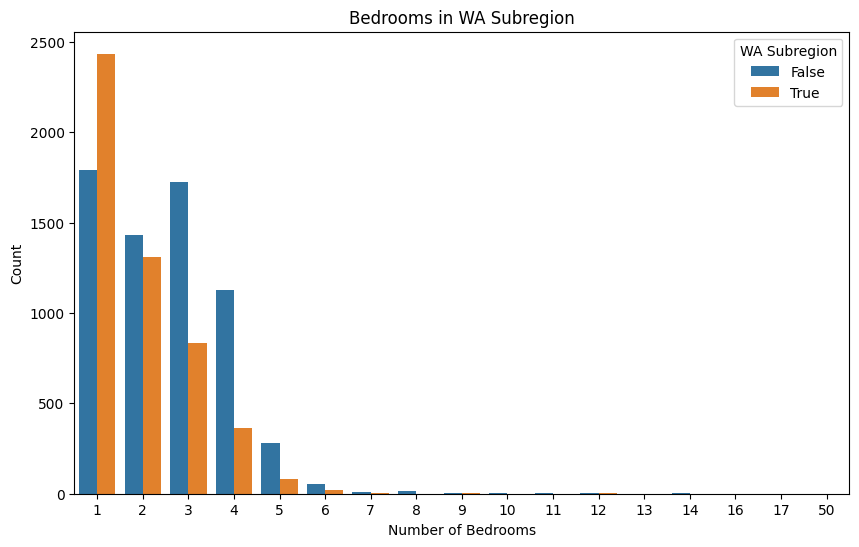

In [354]:
#Creating bar chart for number of bedrooms by WA Subregion
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', hue='wa_subregion', data=df)
plt.title('Bedrooms in WA Subregion')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.legend(title='WA Subregion')
plt.show()

Bar chart above explains that most number of bedrooms is dominated with property located within WA region.

WA_subregion false means that the property is located in the peel region, which in general is located further away from density

## Effect on Room Type to Price

In [355]:
df["room_type"].value_counts()

,count
room_type,
Entire home/apt,9515
Private room,1899
Hotel room,61
Shared room,31


In [356]:
# Calculating Kendall's correlation between price and room_type
correlation, p_value = kendalltau(df['price'], df['room_type'].astype('category').cat.codes)

print(f"Kendall's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Kendall's correlation coefficient: -0.3517018073978517
P-value: 0.0


The above is measuring the correlation between price and room_type. The result of Kendall's correlation tells us that room type and price has a moderate negative correlation.<br>
This defines that room like entire homes/apt tend to be more expensive while private room or shared room are more likely to have a lower price.<br><br>
H0: There is NO correlation between price and room_type. <br>
H1: There is correlation between price and room_type. <br><br>
P-value equals to zero indicates that negative correlation between room_type and price is significant. It also means that it fails to accept H0, which means that there is correlation between room_type and price.  

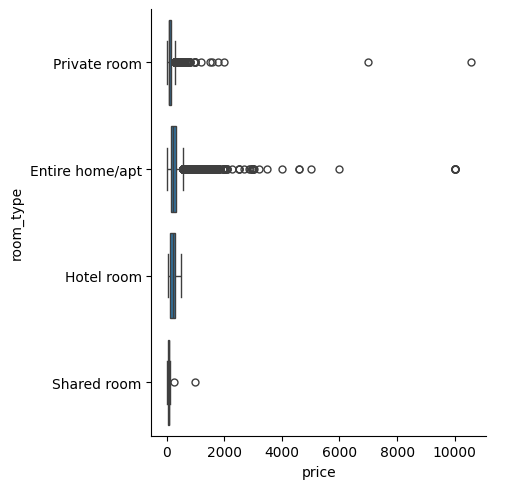

In [357]:
#Creating Boxplot chart for Price and Room_Type
sns.catplot(data=df, x='price', y='room_type', kind='box')
plt.show()

The graph above shows that private room and entire home tend to have higher number of outlier in price. <br>Entire home/apt in particular could have more than one bedrooms, which gives a direct effect to price and main reason of the price stretch.

## Bedrooms Distribution by Room Type

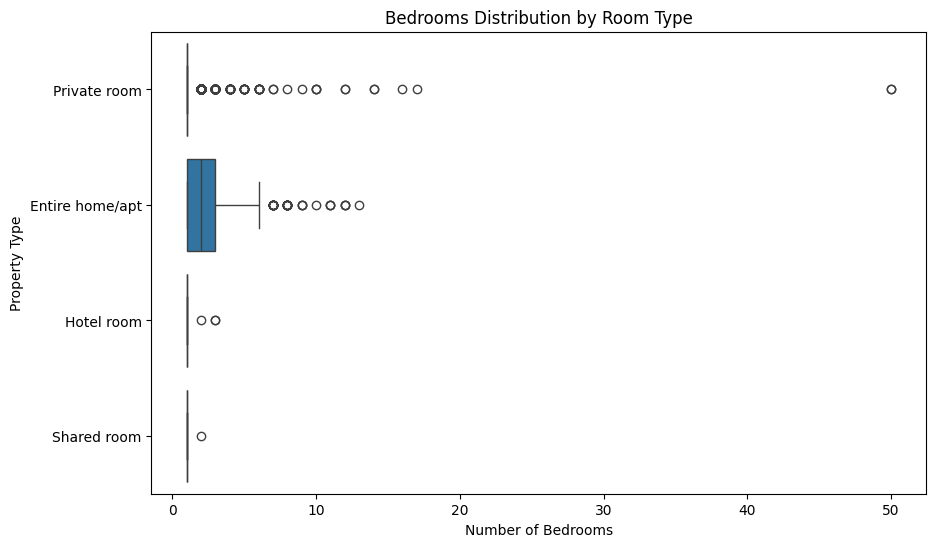

In [358]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='room_type', data=df)
plt.title('Bedrooms Distribution by Room Type')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')
plt.show()

The graph above support the argument from the previous section. This explains that private room or entire home/apt could potentialy possess more bedrooms in the property, while hotel room or shared room would only have fewer number of bedrooms.

## Room Type distribtion in the market

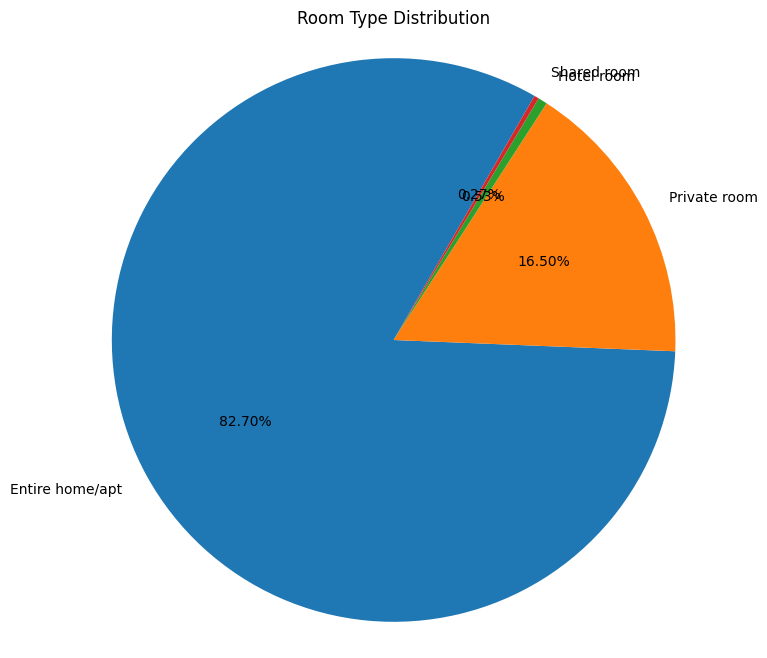

In [359]:
# Count occurrences of each room type
room_type_counts = df['room_type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.2f%%', startangle=60)
plt.title('Room Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart clearly illustrates that the majority of Airbnb listings are categorized as either private rooms or entire homes/apartments, indicating that hosts primarily offer more private and self-contained accommodation options for guests. This trend reflects a preference among travelers for privacy and exclusive use of space during their stay.

## Effect of WA Region to Listing Price

In [360]:
t_statistic, p_value = stats.ttest_ind(df[df["wa_subregion"] == True]['price'], df[df["wa_subregion"] == False]['price'])

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -17.6277
P-value: 0.0000


Adding descriptive analysis to support the above test result.

In [361]:
#Showing Mean, Median, Mode comparing two regions
print(f'Mean price in WA Subregion: ${df[df["wa_subregion"] == True]["price"].mean().round(2)}')
print(f'Median price in WA Subregion: ${df[df["wa_subregion"] == True]["price"].median()}')
print(f'Mode price in WA Subregion: ${df[df["wa_subregion"] == True]["price"].mode().values[0]}')
print("")
print(f'Mean price in Peel region: ${df[df["wa_subregion"] == False]["price"].mean().round(2)}')
print(f'Median price in Peel region: ${df[df["wa_subregion"] == False]["price"].median()}')
print(f'Mode price in Peel region: ${df[df["wa_subregion"] == False]["price"].mode().values[0]}')

Mean price in WA Subregion: $199.87
Median price in WA Subregion: $150.0
Mode price in WA Subregion: $150.0

Mean price in Peel region: $314.72
Median price in Peel region: $240.0
Mode price in Peel region: $200.0


The above compare correlation between price within wa_subregion and price for listing in peel region. Negative t-stats means that mean price of property withinn wa_subregion is significantly lower than listings in peel_region.

H0: No Correlation between Price and WA Subregion <br>
H1: Correlation between Price and WA Subregion exist. <br>

P value came out as zero explaining that the price difference is significant and reject null hypothesis.

This result is supported by the above's descriptive analysis comparing mean, median, and mode price between WA Subregion and Peel Region. <br>

In my opinion, property listings in peel region (outside wa_subregion) might be dominated with bigger property with more bedrooms, and possibly better interior design knowing that these property are often holiday homes.

## Effect on Location to Review Score

In [362]:
t_statistic, p_value = stats.ttest_ind(df[df["wa_subregion"] == True]['review_scores_rating'], df[df["wa_subregion"] == False]['review_scores_rating'])

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -3.7072
P-value: 0.0002


T-stats result came out negative means the difference between wa subregion and peel region is significant. From the test above, I can conclude that rating for listing in WA Subregion is lower than the average rating for listing in Peel Region. <br>
Small amount of P-value indicates that the result is statistically significant. <br><br>
H0: No Significant difference in listing's region to average score rating<br>
H1: There is significant difference in listing's region to average score rating.<br>

From the result, we reject null hypothesis, with significant difference in listing's region and average score. In summary, listings that are located in Peel Region tend to have higher score in review.

## Distribution of Review Score Rating

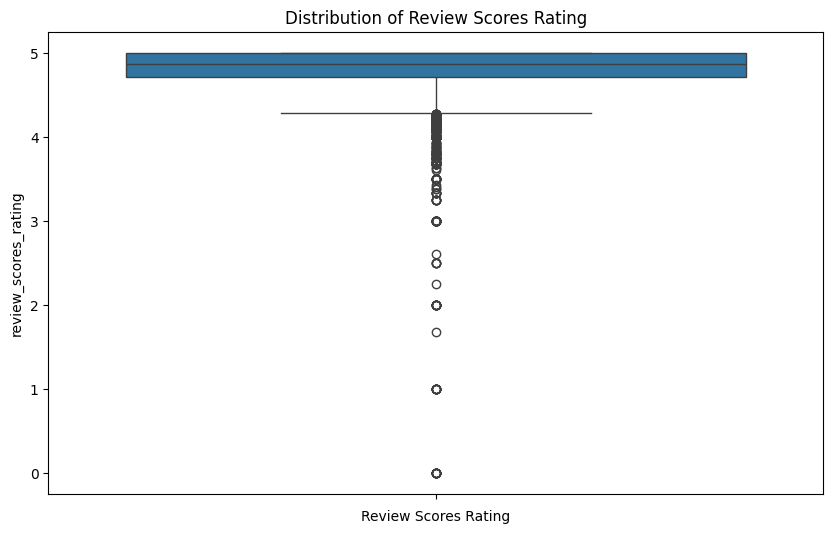

In [363]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='review_scores_rating', data=df)
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.show()

The boxplot above shows that the majority of reviews are higher than 4.5 out of 5.0, indicating a generally positive customer experience with the listings. While there are a few outliers with lower ratings, very few of these outliers fall below 3.0.

# vi. Pengambilan Kesimpulan

This analysis aimed to identify the best strategy for Airbnb listings in Western Australia by focusing on profitability through location, pricing, and guest satisfaction.
From the research above, I found that Peel Region has a higher concentration of listings and higher pricing, making it potentially more profitable, while WA Subregion listings tend to be smaller property size which might offer higher occupancy rates. Private rooms and private property (listed above as entire home/apt) dominates the majority of the market.
Peel Region's listings, often larger vacation homes with more amenities, attracting higher guest satisfaction and review scores. From the conducted correlation test, location is a key factor influencing both price and ratings, making it essential factor to consider.
I would suggest to look more in the potential for higher returns in Peel Region against the likelihood of more consistent occupancy in WA Subregion.


Recommendations for investors: <br>
- Prioritize looking for an entire property in Peel Region with minimum 2 bedrooms. <br>
- Look for location that has easy access and close to tourist attraction point such as winery and natural scenery.<br>
- Adjusting price for seasonal trends to maximize profitability. <br>
- Last, focus on cleanliness, communication and responsiveness to enhance customer experience.

By focusing on guest satisfaction, strategic pricing, location, and property type, investors can enhance their Airbnb listings for profitability and success in Western Australia.